In [97]:
import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [98]:
experiment_results_path = Path(os.getcwd()).parent / 'experiment_results'
gpt3point5_gpt3point5_path = experiment_results_path / 'gpt-3.5-turbo_gpt-3.5-turbo'
gpt4_gpt4_path = experiment_results_path / 'gpt-4_gpt-4'
experiment_paths = [gpt3point5_gpt3point5_path, gpt4_gpt4_path]

In [99]:
experiment_results = {}
for experiment_path in experiment_paths:
    files = [path for path in (experiment_path / "outputs" / "evaluation").iterdir() if path.is_file()]
    for file in files:
        with open(file, 'r') as f:
            data = json.load(f)
            if experiment_path.name not in experiment_results:
                experiment_results[experiment_path.name] = []
            experiment_results[experiment_path.name].append({
                "trial": int(file.name.replace(".json", "")),
                "accuracy": data["accuracy"],
                "total": data["total"],
                "correct": data["correct"],
                "incorrect": data["incorrect"],
            })
            
for experiment_path in experiment_paths:
    experiment_results[experiment_path.name].sort(key=lambda x: x["trial"])
    print(experiment_path.name, len(experiment_results[experiment_path.name]))
experiment_results

gpt-3.5-turbo_gpt-3.5-turbo 10
gpt-4_gpt-4 10


{'gpt-3.5-turbo_gpt-3.5-turbo': [{'trial': 0,
   'accuracy': 0.835,
   'total': 400,
   'correct': 334,
   'incorrect': 66},
  {'trial': 1,
   'accuracy': 0.8325,
   'total': 400,
   'correct': 333,
   'incorrect': 67},
  {'trial': 2,
   'accuracy': 0.86,
   'total': 400,
   'correct': 344,
   'incorrect': 56},
  {'trial': 3,
   'accuracy': 0.8675,
   'total': 400,
   'correct': 347,
   'incorrect': 53},
  {'trial': 4,
   'accuracy': 0.8525,
   'total': 400,
   'correct': 341,
   'incorrect': 59},
  {'trial': 5,
   'accuracy': 0.8375,
   'total': 400,
   'correct': 335,
   'incorrect': 65},
  {'trial': 6,
   'accuracy': 0.87,
   'total': 400,
   'correct': 348,
   'incorrect': 52},
  {'trial': 7,
   'accuracy': 0.8275,
   'total': 400,
   'correct': 331,
   'incorrect': 69},
  {'trial': 8,
   'accuracy': 0.8475,
   'total': 400,
   'correct': 339,
   'incorrect': 61},
  {'trial': 9,
   'accuracy': 0.84,
   'total': 400,
   'correct': 336,
   'incorrect': 64}],
 'gpt-4_gpt-4': [{'trial'

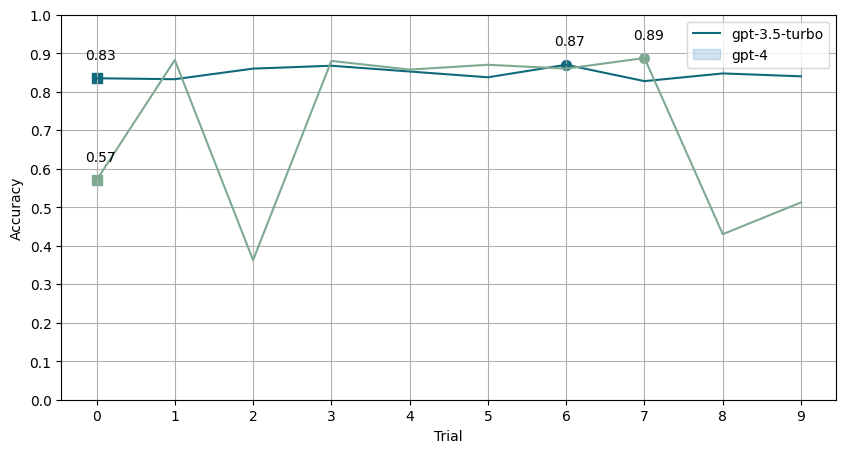

In [100]:
colors = ["#116A7B", "#7EAA92"]
fig, ax = plt.subplots(figsize=(10, 5))
for idx, experiment_path in enumerate(experiment_paths):
    df = pd.DataFrame(experiment_results[experiment_path.name])
    df["accuracy"] = df["correct"] / df["total"]
    sns.lineplot(data=df, x="trial", y="accuracy", label=experiment_path.name)
    ax.set_xlabel("Trial")
    ax.set_ylabel("Accuracy")
    ax.legend(['gpt-3.5-turbo', 'gpt-4'])
    ax.set_ylim([0, 1])
    ax.set_xticks(range(0, 10, 1))
    ax.set_yticks([y / 100 for y in range(0, 110, 10)])
    
    max_accuracy = df["accuracy"].max()
    max_accuracy_trial = df[df["accuracy"] == max_accuracy]["trial"].values[0]
    ax.scatter(max_accuracy_trial, max_accuracy, s=50, color=colors[idx])
    ax.lines[-1].set_color(colors[idx])
    ax.annotate(f"{max_accuracy:.2f}", (max_accuracy_trial, max_accuracy), xytext=(max_accuracy_trial - 0.15, max_accuracy + 0.05))
    # ax.axvline(x=max_accuracy_trial, color=colors[idx], linestyle='--')
    
    initial_accuracy = df[df["trial"] == 0]["accuracy"].values[0]
    ax.scatter(0, initial_accuracy, s=50, color=colors[idx], marker='s')
    ax.annotate(f"{initial_accuracy:.2f}", (0, initial_accuracy), xytext=(-0.15, initial_accuracy + 0.05))
    # ax.axhline(y=initial_accuracy, color=colors[idx], linestyle='--')
    ax.grid(True)

In [101]:
fig.savefig("accuracy.png", dpi=300)